## Opgave 1

In [1]:
# coding: utf-8
import numpy as np
import math
import scipy.special

In [2]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import matplotlib as mpl
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
from probfit import BinnedLH, Chi2Regression, Extended, gaussian
import sys                                             # Modules to see files and folders in directories
from scipy import stats

In [3]:
sys.path.append('../External_Functions')
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [4]:
p = 18.0/37
N = 50
k = 25

In [5]:
def func(rolls, p, i):
    return (scipy.special.factorial(rolls) / (scipy.special.factorial(i) * scipy.special.factorial(rolls-i))) * p**i * (1-p)**(rolls-i)

### 1.1.1

In [6]:
print(f"Probability of 25 successes with 50 rolls is: {func(N, p, k):7.5f}") 

Probability of 25 successes with 50 rolls is: 0.11024


In [7]:
total = 0
for i in range(26):
    #print(f"Probability of {i:2d} successes with 50 rolls is: {func(50, p, i):7.5f}") 
    total += func(50, p, i)
#print(f"Probability of 25 successes with 50 rolls is: {func(50, p, 25):7.5f}") 

In [8]:
print(f"Probability of 26 or more success with 50 rolls is: {1-total:7.5f}")

Probability of 26 or more success with 50 rolls is: 0.36946


### 1.1.2

In [21]:
totalprob = 0
prob = 0
rolls = 20
while totalprob < 0.95:
    prob = 0
    for i in range(20):
        prob += func(rolls, p, i) #prob of "i" successes, with "rolls" rolls
    totalprob = 1-prob
    print(f"Probability of AT LEAST 20 successes with {rolls:2d} rolls is: {totalprob:7.5f}") 
    rolls += 1
print(f"Probability of AT LEAST 20 successes with {rolls:2d} rolls is: {totalprob:7.5f}") 

Probability of AT LEAST 20 successes with 20 rolls is: 0.00000
Probability of AT LEAST 20 successes with 21 rolls is: 0.00001
Probability of AT LEAST 20 successes with 22 rolls is: 0.00004
Probability of AT LEAST 20 successes with 23 rolls is: 0.00015
Probability of AT LEAST 20 successes with 24 rolls is: 0.00049
Probability of AT LEAST 20 successes with 25 rolls is: 0.00133
Probability of AT LEAST 20 successes with 26 rolls is: 0.00312
Probability of AT LEAST 20 successes with 27 rolls is: 0.00653
Probability of AT LEAST 20 successes with 28 rolls is: 0.01245
Probability of AT LEAST 20 successes with 29 rolls is: 0.02191
Probability of AT LEAST 20 successes with 30 rolls is: 0.03599
Probability of AT LEAST 20 successes with 31 rolls is: 0.05571
Probability of AT LEAST 20 successes with 32 rolls is: 0.08187
Probability of AT LEAST 20 successes with 33 rolls is: 0.11493
Probability of AT LEAST 20 successes with 34 rolls is: 0.15496
Probability of AT LEAST 20 successes with 35 rolls is: 

In [20]:

totalprob = 1
k = 20
n = 20
while totalprob > 0.05:
    prob = 0
    for i in range(20):
        prob += func(n, p, i)
    print(f"Chance of getting 0-19 success with {n} rolls is {prob:.10f}")
    totalprob = prob
    n +=1
print(n)

Chance of getting 0-19 success with 20 rolls is 0.9999994487
Chance of getting 0-19 success with 21 rolls is 0.9999937863
Chance of getting 0-19 success with 22 rolls is 0.9999632555
Chance of getting 0-19 success with 23 rolls is 0.9998482835
Chance of getting 0-19 success with 24 rolls is 0.9995088055
Chance of getting 0-19 success with 25 rolls is 0.9986720379
Chance of getting 0-19 success with 26 rolls is 0.9968816570
Chance of getting 0-19 success with 27 rolls is 0.9934667992
Chance of getting 0-19 success with 28 rolls is 0.9875484814
Chance of getting 0-19 success with 29 rolls is 0.9780933911
Chance of getting 0-19 success with 30 rolls is 0.9640129728
Chance of getting 0-19 success with 31 rolls is 0.9442934681
Chance of getting 0-19 success with 32 rolls is 0.9181340351
Chance of getting 0-19 success with 33 rolls is 0.8850676416
Chance of getting 0-19 success with 34 rolls is 0.8450432618
Chance of getting 0-19 success with 35 rolls is 0.7984563261
Chance of getting 0-19 s

## 1.2 

1.2 sigma - 2.5 sigma

The formular for calculating this uses the following:
    mu +/- x sigma = erf(x/sqrt(2))
    
so to calculate how big a portion lies between 2.5 sigma and 1.2 sigma, we calculate for each and subtract the results:

$erf\left(\frac{x}{\sqrt(2)}\right)$

$erf(x) = \frac{1}{\sqrt{\pi}}\int^x_{-x} e^{-t^2}dt$

erf(2.5/sqrt(2))-erf(1.2/sqrt(2)) = .2177200099

## 1.3

### 1.3.1 
Poissonian, since the error rate is unknown, the number of trials is unknown

### 1.3.2


In [91]:
def poisson(k, lamb):
    return np.exp(-lamb)*(lamb**k) / (scipy.special.factorial(k))

In [92]:
val = 0
for i in range(8,100):
    val += poisson(i, 4.1455)
print(val)

0.06027285608120166


For this problem we use the poisson distribution given by:
$\exp(-\lambda)\cdot \frac{\lambda^k}{k!}$

And since we know that the integral form 8-inf is 22/365, the area from 0-7 should be (365-22)/365 = 0,939726027
We can solve a long equation where lambda is the unknown for all trials (k) 0-7 as such
0,939726027 = $\exp(-\lambda)\cdot \frac{\lambda^0}{0!} + ... + \exp(-\lambda)\cdot \frac{\lambda^7}{7!}$
and solve for $\lambda$ which comes out as 4.145516896 (also a negative value, but we can be quite certain is not the right one (also a bunch of complex values but likewise for those).
To test if this is actually correct, but can calculate area under for function from 8 to inf (~100) with a loop and see that we get 0.0603, which is the same as 22/365, so the assignment is solved.
The average number of daily mistakes is thus: 4.146

In [67]:
r = np.random
r.seed(13375336)

In [87]:
x = np.linspace(-1,1,1000)
y = np.random.normal(0, 1, 1000)

In [83]:
def QND(f_ax, f_x, f_y, f_min=0, f_max=1, f_title='the title', f_ylabel='y-label', f_xlabel='x_label'):
    t_hist = f_ax.hist(f_y, bins=20, range=(f_min, f_max), histtype='step', label='Binned Data')#, weights=1/new_eL30cm)
    f_ax.set(xlabel=f_xlabel, ylabel=f_ylabel, title=f_title)
    t_x, t_y, t_sy = get_bincenter_and_counts_in_range(t_hist, f_min, f_max)
    t_binwidth = t_x[1] - t_x[0]
    t_chi2 = Chi2Regression(gauss_extended, t_x, t_y, t_sy) 
    t_minuit = Minuit(t_chi2, pedantic=False, N=f_y.sum()*t_binwidth, mu=f_y.mean(), sigma=f_y.std(ddof=1), print_level=0) 
    t_minuit.migrad();
    t_fit_N, t_fit_mu, t_fit_sigma = t_minuit.args 
    t_xaxis = np.linspace(min(f_y), max(f_y), 10000)
    t_yaxis = gauss_extended(t_xaxis, *t_minuit.args)
    t_chi2, t_entries = calculate_chi2(gauss_extended, t_x, t_y, t_sy, *t_minuit.args)
    t_NDOF = t_entries - len(t_minuit.args)
    t_chi2_prob =  stats.chi2.sf(t_chi2, t_NDOF) 
    f_ax.plot(t_xaxis, t_yaxis, '-', label='Fit')
    f_ax.set_xlim([min(f_y)*0.9,max(f_y)*1.1])
    d = {'Entries': len(f_y),'Mean': f_y.mean(),'Std': f_y.std(ddof=1),'Chi2': t_chi2,'ndf': t_NDOF, 'Prob': t_chi2_prob,}
    for name in t_minuit.parameters:
        d[name] = [t_minuit.values[name], t_minuit.errors[name]]
    text = nice_string_output(d, extra_spacing=2, decimals=4)
    add_text_to_ax(0.02, 0.95, text, f_ax, fontsize=12)
    f_ax.legend()

def get_bincenter_and_counts_in_range(hist, xmin=None, xmax=None):
    
    if xmin is None:
        xmin = np.min(hist)
    if xmax is None:
        xmax = np.max(hist)
    
    counts, bin_edges, _ = hist
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    mask1 = (xmin < bin_centers) & (bin_centers <= xmax) 
    mask2 = counts > 0
    mask_final = mask1 & mask2
    return bin_centers[mask_final], counts[mask_final], np.sqrt(counts[mask_final])

def calculate_chi2(function, x_values, y_values, sy_values, *fitparameters):
    # traditional loop-version
    chi2_val = 0
    entries = 0
    for x, y, sy in zip(x_values, y_values, sy_values):
        if y > 0:
            f = function(x, *fitparameters) # calc the model value
            residual  = ( y-f ) / sy  # find the uncertainty-weighted residual
            chi2_val += residual**2  # the chi2-value is the squared residual
            entries += 1 # count the bin as non-empty since sy>0 (and thus y>0)
    
    # numpy version
    mask = (y_values>0)
    yhat = function(x_values, *fitparameters)
    chi2_val = np.sum( (y_values[mask]-yhat[mask])**2/sy_values[mask]**2)
    entries = sum(mask)
            
    return chi2_val, entries

# Define your PDF / model 
def gauss_pdf(x, mu, sigma):
    """Normalized Gaussian"""
    return 1 / np.sqrt(2 * np.pi) / sigma * np.exp(-(x - mu) ** 2 / 2. / sigma ** 2)


def gauss_extended(x, N, mu, sigma) :
    """Non-normalized Gaussian"""
    return N * gauss_pdf(x, mu, sigma)

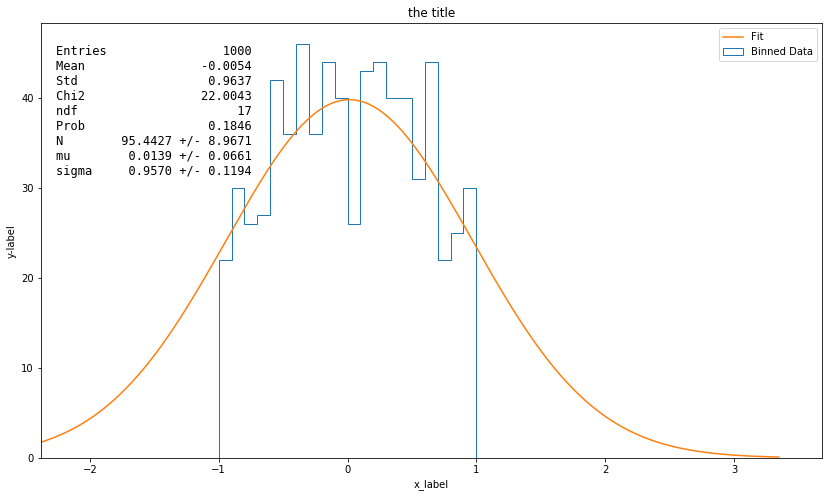

In [86]:
fig, ax = plt.subplots(figsize=(14,8))
QND(ax, x, y, f_min=-1, f_max=1)